# Boston dataset using sklearn

## import libraries

In [1]:
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## load boston dataset

In [2]:
boston=datasets.load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## EDA

In [8]:
## assign data and target to x and y as numpy array

x=boston.data
y=boston.target


# convert to dataframe
df=pd.DataFrame(x,columns=boston.feature_names)
print(df.head())

y[:5]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


array([24. , 21.6, 34.7, 33.4, 36.2])

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [44]:
boston.target
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [12]:
boston.DESCR


".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

## visual EDA 

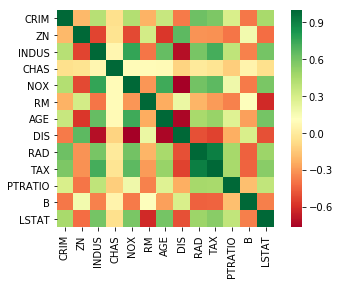

In [13]:
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


## Predicting house value from single feature

In [14]:
# no of rooms and house price 


x_rooms=df.iloc[:,5].values


In [15]:
type(x_rooms),type(y)

(numpy.ndarray, numpy.ndarray)

In [16]:
x_rooms.shape,y.shape

((506,), (506,))

In [17]:
x_rooms=x_rooms.reshape(-1,1)
y=y.reshape(-1,1)

## plot house value vs no of rooms


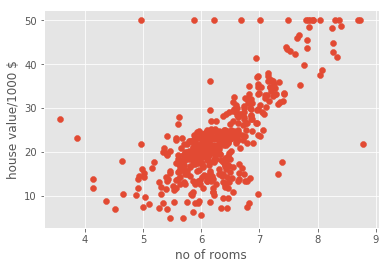

In [18]:
plt.style.use('ggplot')

plt.scatter(x_rooms,y)
plt.xlabel('no of rooms')
plt.ylabel('house value/1000 $')
plt.show()

## import model linear regression

In [19]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

## train model

In [20]:
reg.fit(x_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## prediction data

In [21]:
prediction_space=np.linspace(min(x_rooms),max(x_rooms)).reshape(-1,1)

## plot model

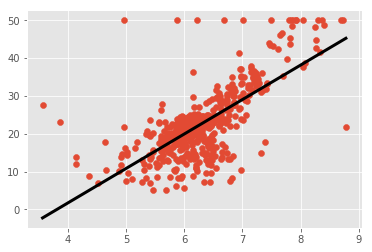

In [22]:
plt.scatter(x_rooms,y)
plt.plot(prediction_space,reg.predict(prediction_space),color='black',linewidth=3)
plt.show()

## predict house value from all features

## split data in train and test 

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## create regressor

In [24]:
reg=LinearRegression()

## train model

In [25]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## predicion on test data

In [26]:
y_pred= reg.predict(x_test)

## loss function 

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_pred,y_test)

21.517444231176995

## print rmse and r^2

In [29]:
print("R^2 is {}".format(reg.score(x_test,y_test)))

R^2 is 0.711226005748496


In [30]:
print("root mean square error is {}".format(np.sqrt(mean_squared_error(y_pred,y_test))))

root mean square error is 4.638689926172797


## NOTE: splitting data is not indicative of model's ability to generalize , solution is cross validation

### model performance and cross validation

In [31]:
from sklearn.model_selection import cross_val_score

### define cross validation

In [32]:
cv_scores=cross_val_score(reg,x,y,cv=5)  # 5 folds cross validation

In [33]:
print("5 folds cross validation scores {}".format(cv_scores))

5 folds cross validation scores [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [34]:
print('5 folds cross validation scores\'s avearage {}'.format(np.mean(cv_scores)))

5 folds cross validation scores's avearage 0.3532759243958772


## NOTE: regularized regression for penalizing too high or too low coefficients which cause overfitting or underfitting

### import regressor 

In [36]:
from sklearn.linear_model import Lasso

In [61]:
lasso=Lasso(alpha=0.2,normalize=True)

### fit regressor to the data 

In [62]:
lasso.fit(x,y)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### print and compute coefficients

In [63]:
lasso_coeff=lasso.fit(x,y).coef_

In [64]:
print("lasso coefficients {}".format(lasso_coeff))

lasso coefficients [-0.          0.         -0.          0.         -0.          1.12329086
 -0.          0.         -0.         -0.         -0.          0.
 -0.25158386]


## plot lasso coefficients

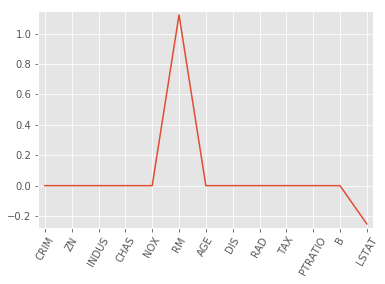

In [65]:

plt.plot(range(len(boston.feature_names)),lasso_coeff)
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
plt.margins(0.02)
plt.show()              # at alpha 0.4 it overfitted so lowered alpha to 0.2 


## according to graph room is most important feature

### Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

## Ridge regularization 

### import Ridge regressor

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

### Setup the array of alphas and lists to store scores

In [69]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

### instansiate regressor

In [70]:
ridge=Ridge(normalize=True)

### Compute scores over range of alphas

for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    ridge.apha=alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,x,y,cv=10)
    
     # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
ridge_scores=np.array(ridge_scores).reshape(-1,1)
ridge_scores_std=np.array(ridge_scores_std).reshape(-1,1)
    
plt.plot(ridge_scores,ridge_scores_std)
plt.show()